In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data
import keras #helps for ANN model construction
import tensorflow as tf #helps for ANN model construction
from sklearn.preprocessing import MinMaxScaler #helps for data normalization
from sklearn.preprocessing import StandardScaler #helps for standardation of input data
import math #helps with calculating evaluation metrics
import sklearn.metrics #helps with calculating evaluation metrics

# Load data using pandas package
Data structure and data visualiazation


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/movies_final.csv',encoding='latin1')
#70/30 split
training_movies = pd.read_csv('/content/drive/MyDrive/data/training_movies.csv')

testing_movies = pd.read_csv('/content/drive/MyDrive/data/testing_movies.csv')

In [ ]:
print (df.columns) # Names of columns

Index(['Title', 'Duration', 'Budget', 'Reviews_by_Users', 'IMDB_Score',
       'Gross_Earnings'],
      dtype='object')


In [ ]:
print (df.shape)   # Size of dataset

(1874, 6)


In [ ]:
print (df.head())  # Display of the first few samples

                   Title  Duration    Budget  Reviews_by_Users  IMDB_Score  \
0         102 Dalmatians       100  85000000                77         4.8   
1                28 Days       103  43000000               194         6.0   
2              3 Strikes        82   6000000                10         4.0   
3               Aberdeen       106   6500000                35         7.3   
4  All the Pretty Horses       220  57000000               183         5.8   

   Gross_Earnings  
0        66941559  
1        37035515  
2         9821335  
3           64148  
4        15527125  


In [ ]:
print (df.info())  # Infomation of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1874 non-null   object 
 1   Duration          1874 non-null   int64  
 2   Budget            1874 non-null   int64  
 3   Reviews_by_Users  1874 non-null   int64  
 4   IMDB_Score        1874 non-null   float64
 5   Gross_Earnings    1874 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 88.0+ KB
None


In [ ]:
df = df.drop('Title', axis=1)
training_movies = training_movies.drop('Title', axis=1)
testing_movies = testing_movies.drop('Title', axis=1)

In [ ]:
print (df.describe()) # Display some statistical results

          Duration        Budget  Reviews_by_Users   IMDB_Score  \
count  1874.000000  1.874000e+03       1874.000000  1874.000000   
mean    106.176094  3.524567e+07        341.581110     6.335379   
std      19.481779  3.892760e+07        438.131094     1.089033   
min      20.000000  2.180000e+02          2.000000     1.900000   
25%      93.000000  9.000000e+06         95.250000     5.700000   
50%     102.000000  2.200000e+07        203.000000     6.500000   
75%     116.000000  5.000000e+07        403.750000     7.100000   
max     280.000000  3.000000e+08       5060.000000     9.000000   

       Gross_Earnings  
count    1.874000e+03  
mean     4.347863e+07  
std      6.397214e+07  
min      4.230000e+02  
25%      4.357694e+06  
50%      2.099017e+07  
75%      5.488744e+07  
max      7.605058e+08  


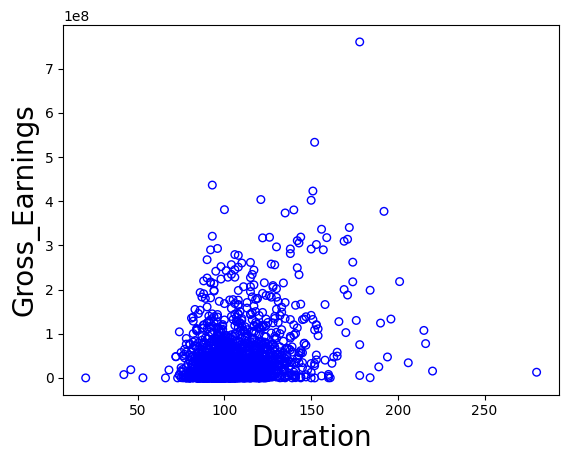

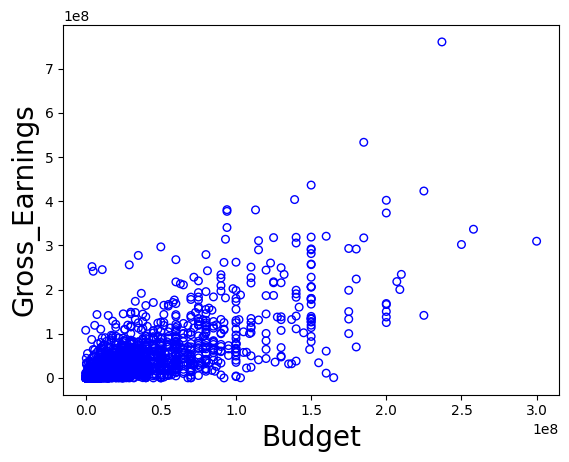

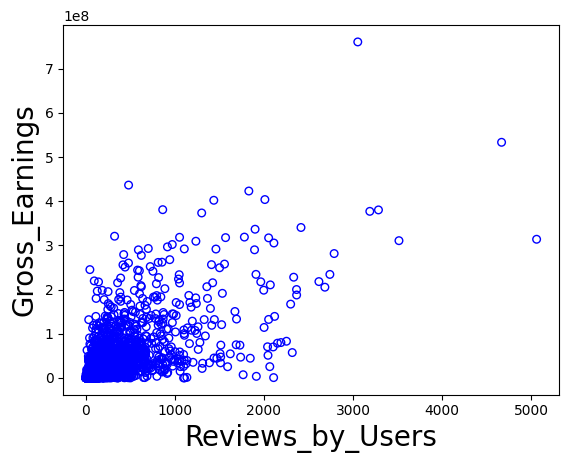

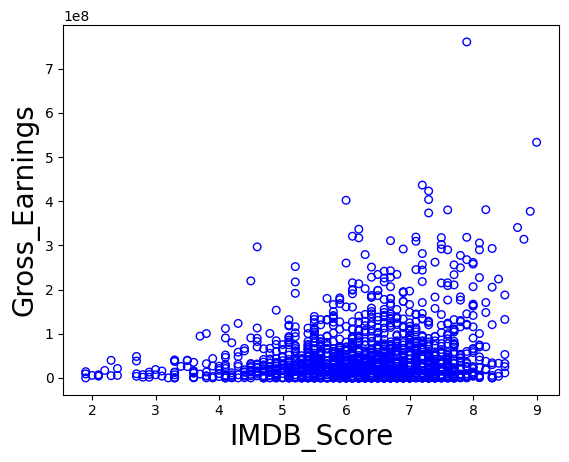

In [ ]:
# Visualization
for column in df.columns[:-1]:
  plt.scatter(df[column], df['Gross_Earnings'], s=30, marker='o', edgecolor=['blue'], c='none')  # Scatter data
  plt.xlabel(column, fontsize=20)
  plt.ylabel('Gross_Earnings', fontsize=20)
  plt.show()

X = df.iloc[:,:-1].values                # input data to be an array
Y = df['Gross_Earnings'].values.reshape(-1,1) #labels which are transformed to a shape of (1874, 1)

# Data Reshape

In [ ]:
x_train = training_movies.iloc[:, 0:4].values

y_train = training_movies.iloc[:, 4].values

x_test = testing_movies.iloc[:, 0:4].values

y_test = testing_movies.iloc[:, 4].values



print(x_train)
print(x_train.shape)

print("----------")

print(y_train)
print(y_train.shape)

[[8.60e+01 2.80e+06 5.30e+01 6.00e+00]
 [1.03e+02 5.00e+07 2.60e+01 6.90e+00]
 [1.09e+02 3.00e+07 2.21e+02 6.10e+00]
 ...
 [8.80e+01 5.00e+06 5.60e+01 5.60e+00]
 [1.02e+02 5.00e+07 5.80e+01 6.60e+00]
 [8.30e+01 4.50e+07 5.48e+02 5.20e+00]]
(1311, 4)
----------
[  475000   206400 10965209 ...   648183    23106 71277420]
(1311,)


# Data normalization



In [ ]:
scaler = MinMaxScaler()   #call the standardation package
scaler.fit(x_train)         #fit the raw data
x_train = scaler.transform(x_train) #normalization of training data
x_test = scaler.transform(x_test)  #normalization of testing data

y_train_max = max(y_train)      #obtain the maximum of training labels for label normalization
y_train = y_train/y_train_max   #normalization of training labels
y_test = y_test/y_train_max     #normalization of testing labels

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(4,)))    # we have 1 neurons for output and 8 neurons for input (SquareFeet)
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-2), 'mean_squared_error') # compile the model with a SGD optimizer
model.fit(x_train, y_train, epochs = 100, batch_size = 64, verbose = 2)             #train the model

Epoch 1/100
21/21 - 0s - loss: 0.5302 - 333ms/epoch - 16ms/step
Epoch 2/100
21/21 - 0s - loss: 0.1921 - 48ms/epoch - 2ms/step
Epoch 3/100
21/21 - 0s - loss: 0.1062 - 44ms/epoch - 2ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0832 - 45ms/epoch - 2ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0765 - 48ms/epoch - 2ms/step
Epoch 6/100
21/21 - 0s - loss: 0.0741 - 44ms/epoch - 2ms/step
Epoch 7/100
21/21 - 0s - loss: 0.0727 - 45ms/epoch - 2ms/step
Epoch 8/100
21/21 - 0s - loss: 0.0715 - 41ms/epoch - 2ms/step
Epoch 9/100
21/21 - 0s - loss: 0.0705 - 49ms/epoch - 2ms/step
Epoch 10/100
21/21 - 0s - loss: 0.0695 - 42ms/epoch - 2ms/step
Epoch 11/100
21/21 - 0s - loss: 0.0684 - 44ms/epoch - 2ms/step
Epoch 12/100
21/21 - 0s - loss: 0.0674 - 70ms/epoch - 3ms/step
Epoch 13/100
21/21 - 0s - loss: 0.0665 - 48ms/epoch - 2ms/step
Epoch 14/100
21/21 - 0s - loss: 0.0655 - 63ms/epoch - 3ms/step
Epoch 15/100
21/21 - 0s - loss: 0.0646 - 65ms/epoch - 3ms/step
Epoch 16/100
21/21 - 0s - loss: 0.0636 - 64ms/epoch - 3ms/step

18/18 [==============================] - 0s 1ms/step


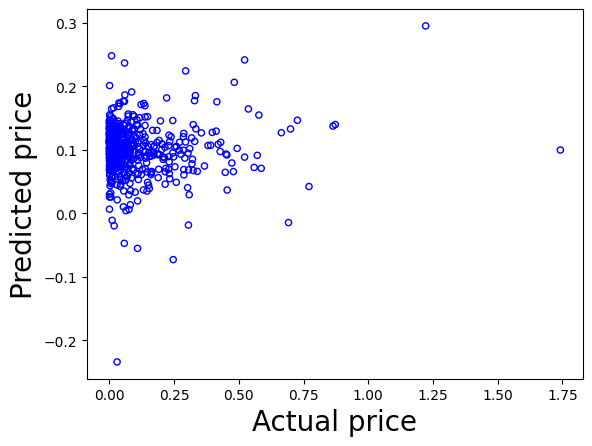

In [ ]:
prediction = model.predict(x_test)    # Predict the testing set

# Visualization
plt.scatter(y_test, prediction, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

In [ ]:

# Calculate the RMSE
mse = sklearn.metrics.mean_squared_error(y_test, prediction)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

# Calculate the r2
r2 = sklearn.metrics.r2_score(y_test, prediction)
print(f'R2: {r2}')

RMSE: 0.16371875674235778
R2: -0.03639149592079205
